In [61]:
# imports
import tensorflow.keras as keras


In [71]:
# Task 0
def autoencoder(input_dims, hidden_layers, latent_dims):
    """
    Creates a vanilla autoencoder

    Args:
        input_dims - integer containing the dimensions of the model input
        hidden_layers - list containing the number of nodes for each hidden
            layer in the encoder, respectively
        latent_dims - integer containing the dimensions of the latent space
            representation

    Returns:
        encoder - the encoder model
        decoder - the decoder model
        auto - the full autoencoder model
    """

    # First, build the encoder
    input_img = keras.Input(shape=(input_dims,))
    # print(input_img.shape)
    encoded = input_img
    for layer in hidden_layers:
        encoded = keras.layers.Dense(layer, activation='relu')(encoded)
    encoded = keras.layers.Dense(latent_dims, activation='relu')(encoded)
    encoder = keras.Model(input_img, encoded, name='encoder')

    # Now, build the decoder
    decoder_img = keras.Input(shape=(latent_dims,))
    decoded = decoder_img
    for layer in hidden_layers[::-1]:
        decoded = keras.layers.Dense(layer, activation='relu')(decoded)
    decoded = keras.layers.Dense(input_dims, activation='sigmoid')(decoded)
    decoder = keras.Model(decoder_img, decoded, name='decoder')

    # Let's put it all together
    # autoencoder_input = keras.Input(shape=(input_dims,))
    encoded_output = encoder(input_img)
    # print(input_img.shape)
    decoded_output = decoder(encoded_output)
    autoencoder = keras.Model(input_img,
                              decoded_output,
                              name='autoencoder')

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return encoder, decoder, autoencoder


In [76]:
# Checker Main File
import numpy as np
import tensorflow as tf

# autoencoder = __import__('0-vanilla').autoencoder

encoder, decoder, auto = autoencoder(784, [128, 64], 32)
# print(auto.layers[0].input_shape)
if len(auto.layers) == 3:
    print(auto.layers[0].input_shape == (None, 784))
    print(auto.layers[1] is encoder)
    print(auto.layers[2] is decoder)

with open('1-test', 'w+') as f:
    f.write(auto.loss + '\n')
    f.write(auto.optimizer.__class__.__name__ + '\n')

with open('2-test', 'w+') as f:
    if len(encoder.layers) == 4:
        try:
            f.write(encoder.layers[0].__class__.__name__ + '\n')
            f.write(str(encoder.layers[0].input_shape) + '\n')
        except:
            f.write('FAIL\n')
        for layer in encoder.layers[1:]:
            try:
                f.write(layer.__class__.__name__ + '\n')
                f.write(layer.activation.__name__ + '\n')
                f.write(str(layer.input_shape) + '\n')
                f.write(str(layer.output_shape) + '\n')
            except:
                f.write('FAIL\n')

with open('3-test', 'w+') as f:
    if len(decoder.layers) == 4:
        try:
            f.write(decoder.layers[0].__class__.__name__ + '\n')
            f.write(str(decoder.layers[0].input_shape) + '\n')
        except:
            f.write('FAIL\n')
        for layer in decoder.layers[1:]:
            try:
                f.write(layer.__class__.__name__ + '\n')
                f.write(layer.activation.__name__ + '\n')
                f.write(str(layer.input_shape) + '\n')
                f.write(str(layer.output_shape) + '\n')
            except:
                f.write('FAIL\n')

False
True
True


Epoch 1/50
235/235 [==============================] - 5s 19ms/step - loss: 0.2415 - val_loss: 0.1669
Epoch 2/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1517 - val_loss: 0.1383
Epoch 3/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1338 - val_loss: 0.1269
Epoch 4/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1244 - val_loss: 0.1186
Epoch 5/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1176 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1129 - val_loss: 0.1096
Epoch 7/50
235/235 [==============================] - 5s 19ms/step - loss: 0.1098 - val_loss: 0.1073
Epoch 8/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1071 - val_loss: 0.1045
Epoch 9/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1048 - val_loss: 0.1025
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1029 - val_lo

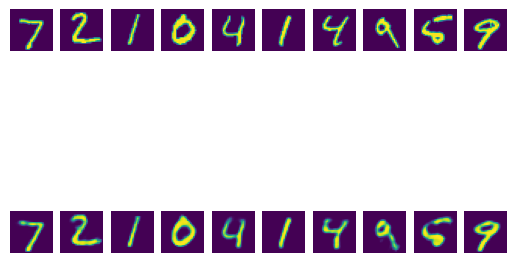

In [ ]:
# Project Main File
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
from tensorflow.keras.datasets import mnist

# autoencoder = __import__('0-vanilla').autoencoder

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
np.random.seed(0)
tf.set_random_seed(0)
encoder, decoder, auto = autoencoder(784, [128, 64], 32)
auto.fit(x_train, x_train, epochs=50,batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded = encoder.predict(x_test[:10])
print(np.mean(encoded))
reconstructed = decoder.predict(encoded)

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i].reshape((28, 28)))
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i].reshape((28, 28)))
plt.show()